In [24]:
import matplotlib
import matplotlib.pyplot as plt
import os
import pickle
import numpy as np
matplotlib.rc('text', usetex=True)

In [25]:
def load(file):
    
    data = pickle.load(open(file, "rb"))
    
    return data

In [26]:
files = [os.path.join("Data", i) for i in sorted(os.listdir("./Data"))]

In [27]:
files

['Data/Meta,d=100,r=5,T=20,test_n=50.pickle',
 'Data/Meta,d=100,r=5,T=5,test_n=50.pickle',
 'Data/Meta,d=100,r=5,train_n=25,test_n=25.pickle',
 'Data/Meta,d=100,r=5,train_n=300,test_n=1000.pickle',
 'Data/Meta,d=100,r=5,train_n=5,test_n=2500.pickle']

In [28]:
f1 = files[0]

In [29]:
f2 = files[1]

In [30]:
f3 = files[2]

In [31]:
f4 = files[3]

In [32]:
f5 = files[4]

In [47]:
data = load(f3)

In [48]:
data.keys()

dict_keys(['metaLRmom', 'metaLRfo', 'betaLR', 'sinthetamom', 'sinthetafo', 'T_list', 'd', 'r', 'train_n', 'test_n', 'reps'])

In [49]:
T_list = data["T_list"]
d = data["d"]
r = data["r"]
train_n = data["train_n"]
test_n = data["test_n"]

metaLRmom = data["metaLRmom"]
sinthetamom = data["sinthetamom"]

metaLRfo = data["metaLRfo"]
sinthetafo = data["sinthetafo"]
betaLR = data["betaLR"]

In [50]:
def plot_angles(T_list, d, r, train_n, test_n, sinthetamom, sinthetafo):
    
    plt.close()
    
    plt.errorbar(T_list, sinthetamom[0], yerr=sinthetamom[1], color="b", marker="x", label= r"LF-MoM")
    plt.errorbar(T_list, sinthetafo[0], yerr=sinthetafo[1],  color="r", marker="*", label= r"LF-FO")
    #plt.errorbar(T_list, betaLR[0], yerr=betaLR[1], color="g", marker="+", label= r"LR")
            
    plt.legend(prop={'size': 20})
    plt.xlabel("Number of Tasks", fontsize=24)
    plt.ylabel(r" $\sin \theta$", fontsize=24)
    
    fname="angle"+",d="+str(d)+",r="+str(r)+",train_n="+str(train_n)+",test_n="+str(test_n)+".pdf"
    
    folder_path="Plots"
    plt.savefig(os.path.join(folder_path, fname), bbox_inches = "tight")
    plt.show()
    #time.sleep(2)
    
    return

In [51]:
def plot_synthetic(T_list, d, r, train_n, test_n, metaLRmom, metaLRfo, betaLR):
    
    plt.close()
    
    plt.errorbar(T_list, metaLRmom[0], yerr=metaLRmom[1], color="b", marker="x", label= r"meta-LR-MoM")
    plt.errorbar(T_list, metaLRfo[0], yerr=metaLRfo[1],  color="r", marker="*", label= r"meta-LR-FO")
    
    betaLRmu = np.array([np.mean(betaLR[0]) for i in range(len(T_list))])
    betaLRsd = np.array([np.mean(betaLR[1]) for i in range(len(T_list))])
    
    plt.plot(T_list, betaLRmu, color="g", label= r"LR")
    plt.fill_between(T_list, betaLRmu+betaLRsd, betaLRmu-betaLRsd, facecolor="lightgreen")
    #plt.hlines(np.mean(betaLR[0]), xmin=T_list[0], xmax=T_list[-1], color="g", label= r"LR")
    #plt.errorbar(T_list, betaLR[0], yerr=betaLR[1], color="g", marker="+", label= r"LR")
            
    plt.legend(prop={'size': 20})
    plt.xlabel("Number of Tasks", fontsize=24)
    plt.ylabel(r" $\ell_2$ Parameter Error", fontsize=24)
    
    fname="synthetic"+",d="+str(d)+",r="+str(r)+",train_n="+str(train_n)+",test_n="+str(test_n)+".pdf"
    
    folder_path="Plots"
    plt.savefig(os.path.join(folder_path, fname), bbox_inches = "tight")
    plt.show()
    #time.sleep(2)
    
    return

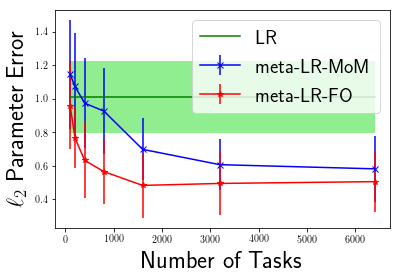

In [52]:
plot_synthetic(T_list, d, r, train_n, test_n, metaLRmom, metaLRfo, betaLR)

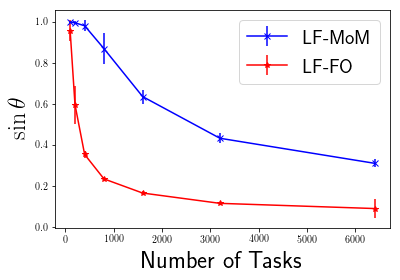

In [53]:
plot_angles(T_list, d, r, train_n, test_n, sinthetamom, sinthetafo)

In [61]:
data = load(f1)

In [62]:
data.keys()

dict_keys(['metaLRmom', 'metaLRfo', 'betaLR', 'sinthetamom', 'sinthetafo', 'train_n_list', 'd', 'r', 'T', 'test_n', 'reps'])

In [63]:
T = data["T"]
d = data["d"]
r = data["r"]
train_n_list = data["train_n_list"]
test_n = data["test_n"]

metaLRmom = data["metaLRmom"]
sinthetamom = data["sinthetamom"]

metaLRfo = data["metaLRfo"]
sinthetafo = data["sinthetafo"]

betaLR = data["betaLR"]

In [64]:
def plot_synthetic_two(T, d, r, train_n_list, test_n, metaLRmom, metaLRfo, betaLR):
    
    plt.close()
    
    plt.errorbar(train_n_list, metaLRmom[0], yerr=metaLRmom[1], color="b", marker="x", label= r"meta-LR-MoM")
    plt.errorbar(train_n_list, metaLRfo[0], yerr=metaLRfo[1],  color="r", marker="*", label= r"meta-LR-FO")
    
    betaLRmu = np.array([np.mean(betaLR[0]) for i in range(len(T_list))])
    betaLRsd = np.array([np.mean(betaLR[1]) for i in range(len(T_list))])
    
    plt.plot(T_list, betaLRmu, color="g", label= r"LR")
    plt.fill_between(T_list, betaLRmu+betaLRsd, betaLRmu-betaLRsd, facecolor="lightgreen")
            
    plt.legend(prop={'size': 20})
    plt.xlabel("Number of Training Points (per Task)", fontsize=20)
    plt.ylabel(r" $\ell_2$ Parameter Error", fontsize=24)
    
    fname="synthetic"+",d="+str(d)+",r="+str(r)+",T="+str(T)+",test_n="+str(test_n)+".pdf"
    
    folder_path="Plots"
    plt.savefig(os.path.join(folder_path, fname), bbox_inches = "tight")
    plt.show()
    #time.sleep(2)
    
    return

In [65]:
def plot_angles_two(T_list, d, r, train_n, test_n, sinthetamom, sinthetafo):
    
    plt.close()
    
    plt.errorbar(T_list, sinthetamom[0], yerr=sinthetamom[1], color="b", marker="x", label= r"LF-MoM")
    plt.errorbar(T_list, sinthetafo[0], yerr=sinthetafo[1],  color="r", marker="*", label= r"LF-FO")
    #plt.errorbar(T_list, betaLR[0], yerr=betaLR[1], color="g", marker="+", label= r"LR")
            
    plt.legend(prop={'size': 20})
    plt.xlabel("Number of Training Points (per Task)", fontsize=20)
    plt.ylabel(r" $\sin \theta$", fontsize=24)
    
    fname="angle"+",d="+str(d)+",r="+str(r)+",T="+str(T)+",test_n="+str(test_n)+".pdf"
    
    folder_path="Plots"
    plt.savefig(os.path.join(folder_path, fname), bbox_inches = "tight")
    plt.show()
    #time.sleep(2)
    
    return

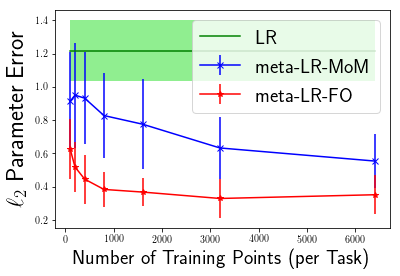

In [66]:
plot_synthetic_two(T, d, r, train_n_list, test_n, metaLRmom, metaLRfo, betaLR)

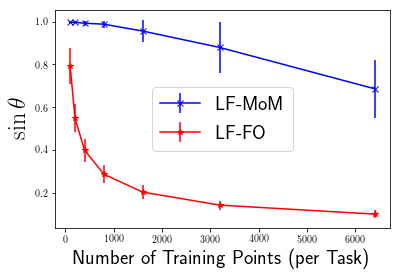

In [67]:
plot_angles_two(T_list, d, r, train_n, test_n, sinthetamom, sinthetafo)